In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [2]:
df = pd.read_excel('Dataset_Kmean.xlsx')

In [6]:
# Encode categorical variables
df_encoded = pd.get_dummies(df, columns=["Education", "WorkType", "Gender", "Region"], drop_first=True)

# Calculate correlation matrix
correlation_matrix = df_encoded.corr()

# Extract correlations with Salary
correlation_with_salary = correlation_matrix["Salary"].sort_values(ascending=False)
print(correlation_with_salary)

Salary                             1.000000
RecommendImpression                0.409231
SiteSpending                       0.336214
SiteTime                           0.199998
Region_London                      0.109510
Gender_Male                        0.106657
Region_Scotland                    0.090172
Education_PhD                      0.087840
Age                                0.065636
Region_South East                  0.061493
Education_Degree                   0.060593
Education_Other                    0.028286
Region_North East                  0.006146
Education_Masters                 -0.002977
Region_East of England            -0.004928
Region_Northern Ireland           -0.010579
WorkType_Public Sector            -0.028943
Region_West Midlands              -0.030012
Region_South West                 -0.036940
WorkType_Unemployed               -0.040195
Region_North West                 -0.049978
WorkType_Self Employed            -0.059198
Region_Wales                    

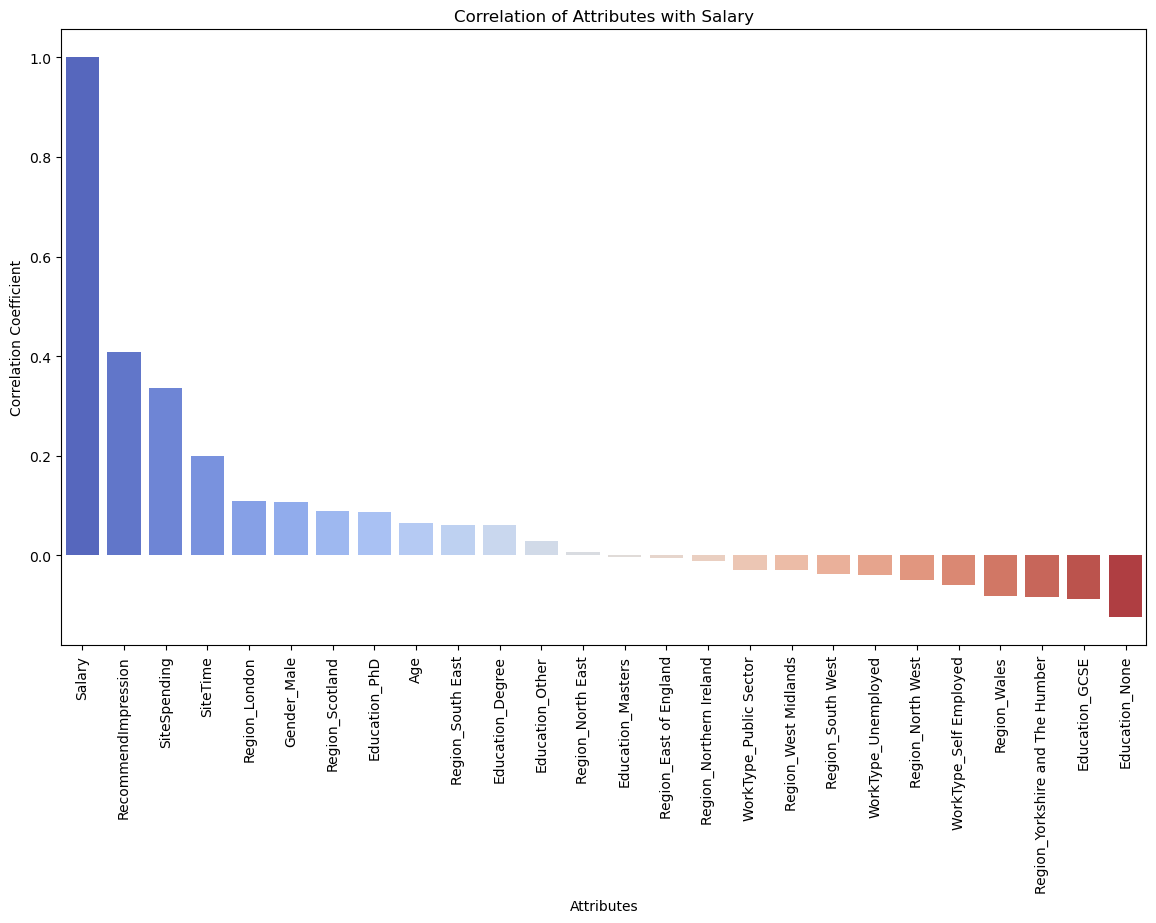

In [7]:
# Plotting the correlation of attributes with Salary using a bar plot
plt.figure(figsize=(14, 8))
sns.barplot(x=correlation_with_salary.index, y=correlation_with_salary.values, palette='coolwarm')
plt.title('Correlation of Attributes with Salary')
plt.xticks(rotation=90)
plt.xlabel('Attributes')
plt.ylabel('Correlation Coefficient')
plt.show()

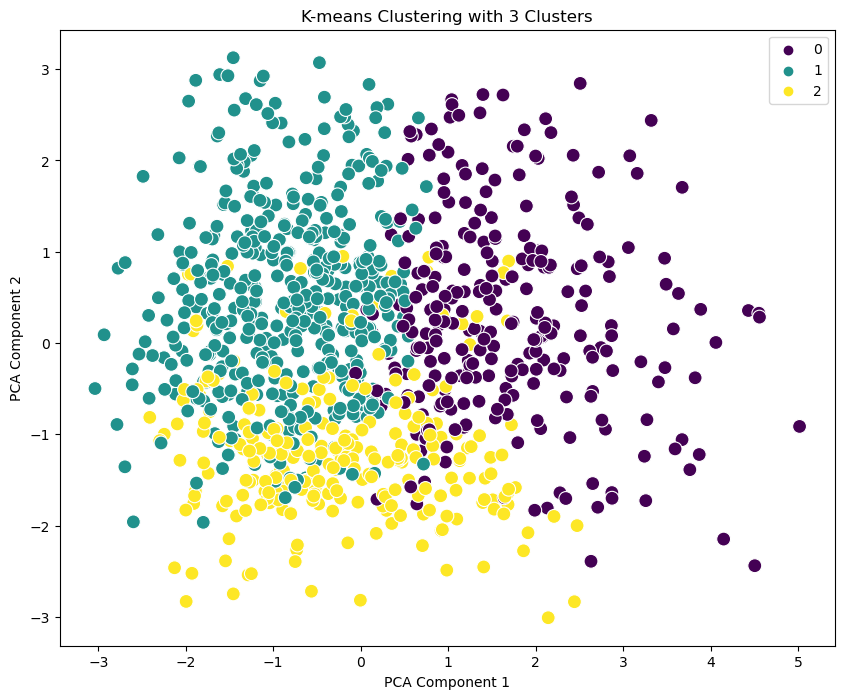

In [13]:
# Encode categorical variables
df_encoded = pd.get_dummies(df, columns=["Education", "WorkType", "Gender", "Region"], drop_first=True)

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)

# Apply k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df_encoded['Cluster'] = kmeans.fit_predict(df_scaled)

# Use PCA for dimensionality reduction to visualize the clusters
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_scaled)
df_encoded['PCA1'] = pca_components[:, 0]
df_encoded['PCA2'] = pca_components[:, 1]

# Plot the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df_encoded, palette='viridis', s=100)
plt.title('K-means Clustering with 3 Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

In [35]:
# Assuming data and centroids are numpy arrays
data = np.array([[1, 2], [3, 4], [5, 6]])
centroids = np.array([[0, 0], [1, 1]])

# Initialize an empty array to store distances
distances = np.zeros((len(data), len(centroids)))

# Calculate distances using a separate loop for each data point
for i, point in enumerate(data):
    for j, centroid in enumerate(centroids):
        distances[i, j] = np.linalg.norm(point - centroid)

print(distances)

[[2.23606798 1.        ]
 [5.         3.60555128]
 [7.81024968 6.40312424]]


In [38]:

distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
print(distances)

[[2.23606798 1.        ]
 [5.         3.60555128]
 [7.81024968 6.40312424]]


[[ 0.94599241  0.75264967]
 [ 0.65452092  0.79284167]
 [-1.35384269 -1.10516133]]
[[ 1.25144493  0.10158374]
 [ 0.06964933  1.5849679 ]
 [-0.94641685 -0.94754085]]


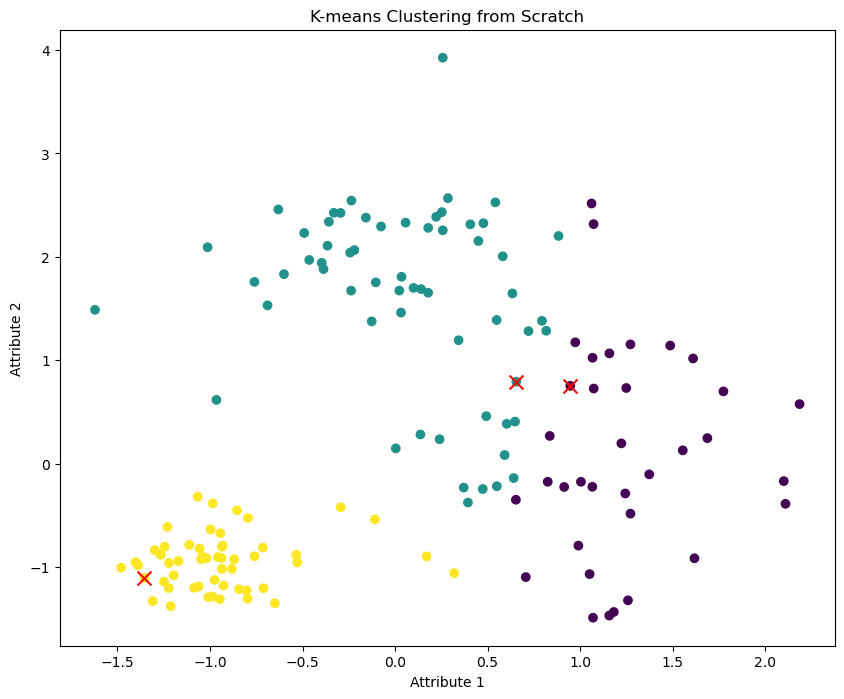

In [63]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a simple dataset
np.random.seed(42)
data = np.vstack((
    np.random.randn(50, 2) * 0.75 + np.array([1, 0]),
    np.random.randn(50, 2) * 0.25 + np.array([-1, -1]),
    np.random.randn(50, 2) * 0.5 + np.array([0, 2])
))

def kmeans(data, k, max_iters=100):
    # Step 1: Initialize centroids randomly from the data points
    n_samples, n_features = data.shape
    centroids = data[np.random.choice(n_samples, k, replace=False)]

    for _ in range(max_iters):
        # Step 2: Assign clusters
        distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
        clusters = np.argmin(distances, axis=1)

        # Step 3: Update centroids
        new_centroids = np.array([data[clusters == i].mean(axis=0) for i in range(k)])
        
        # Check for convergence
        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return clusters, centroids

# Parameters
k = 3
max_iters = 100

# Run k-means
clusters, centroids = kmeans(data, k, max_iters)

# Visualization
plt.figure(figsize=(10, 8))
plt.scatter(data[:, 0], data[:, 1], c=clusters, cmap='viridis', marker='o')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100)
plt.title('K-means Clustering from Scratch')
plt.xlabel('Attribute 1')
plt.ylabel('Attribute 2')
plt.show()


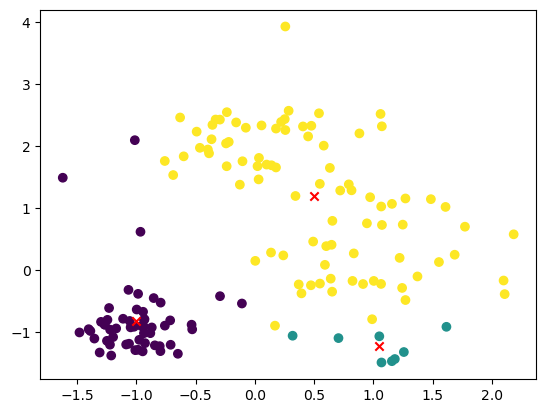

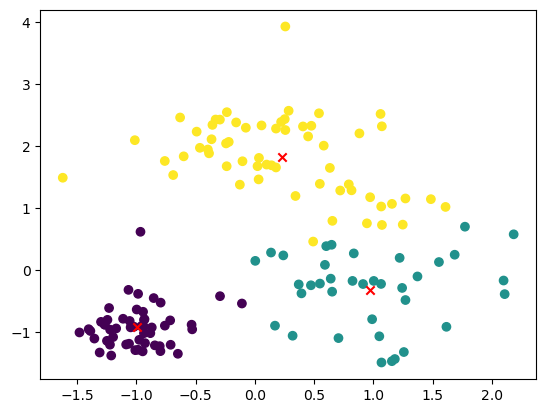

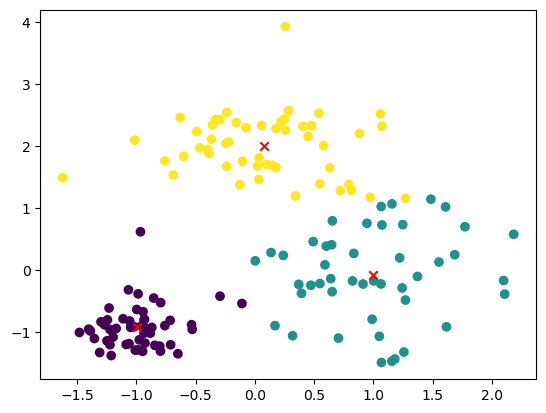

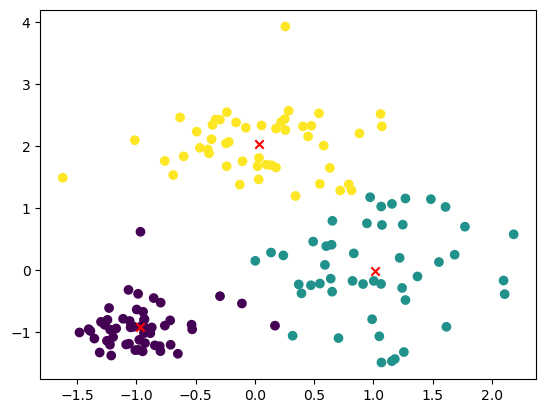

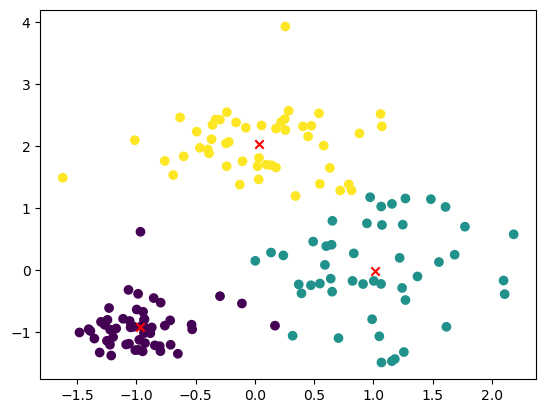

In [103]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Generate a simple dataset
np.random.seed(42)
data = np.vstack((
    np.random.randn(50, 2) * 0.75 + np.array([1, 0]),
    np.random.randn(50, 2) * 0.25 + np.array([-1, -1]),
    np.random.randn(50, 2) * 0.5 + np.array([0, 2])
))


def KMeans(data, k, maxiters=100):

    centroids = np.array(random.sample(list(data), k))
    distance = np.zeros((data.shape[0], k))

    for iter in range(maxiters):

        for i, point in enumerate(data):

            for j, center in enumerate(centroids):

                distance[i, j] = np.linalg.norm( point - center )

        clusters = np.argmin(distance, axis=1)

        new_centroids = np.array([ data[ clusters == i ].mean(axis=0) for i in range(k) ])

        if np.all(new_centroids == centroids):
            break

        centroids = new_centroids

        if iter % 2 == 0:
            plt.scatter(data[:, 0], data[:, 1], c=clusters)
            plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='r')
            plt.show()
            

    return centroids, clusters


k = 3
centroids, clusters = KMeans(data, k)

plt.scatter(data[:, 0], data[:, 1], c=clusters)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='r')
plt.show()


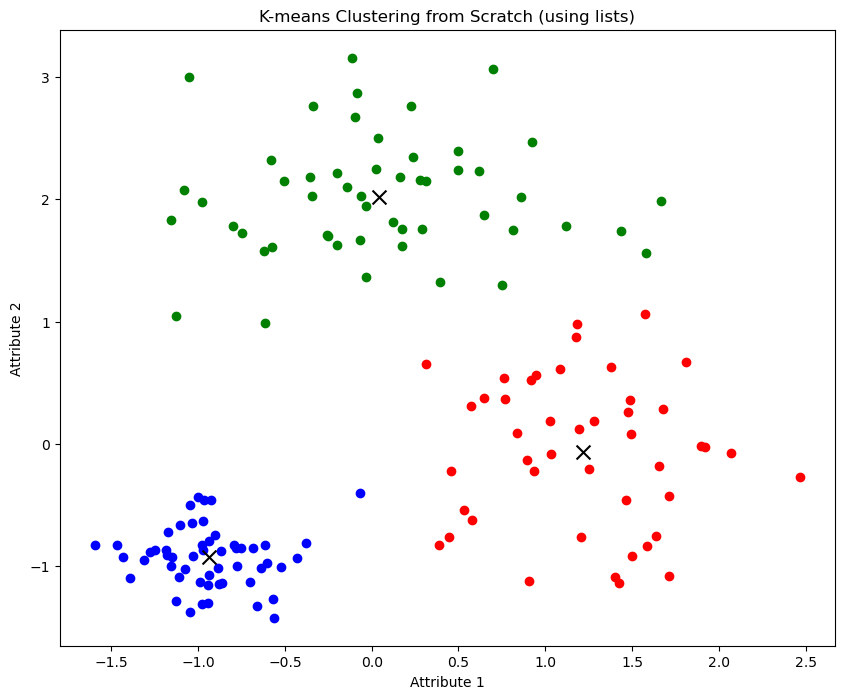

In [72]:
import random
import matplotlib.pyplot as plt

# Generate a simple dataset
random.seed(42)
data = [[random.gauss(1, 0.75), random.gauss(0, 0.75)] for _ in range(50)] + \
       [[random.gauss(-1, 0.25), random.gauss(-1, 0.25)] for _ in range(50)] + \
       [[random.gauss(0, 0.5), random.gauss(2, 0.5)] for _ in range(50)]

def euclidean_distance(point1, point2):
    return sum((x - y) ** 2 for x, y in zip(point1, point2)) ** 0.5

# Number of clusters
k = 3

# Randomly sample initial centroids from the dataset
centroids = random.sample(data, k)

# Initialize variables
distances = [[0] * k for _ in range(len(data))]
clusters = [0] * len(data)

# K-means clustering
for _ in range(1000):
    # Calculate distances
    for i, point in enumerate(data):
        for j, centroid in enumerate(centroids):
            distances[i][j] = euclidean_distance(point, centroid)
    
    # Assign clusters based on closest centroid
    for i, row in enumerate(distances):
        clusters[i] = row.index(min(row))
    
    # Update centroids
    new_centroids = [[0, 0] for _ in range(k)]
    counts = [0] * k
    for i, point in enumerate(data):
        cluster_index = clusters[i]
        new_centroids[cluster_index][0] += point[0]
        new_centroids[cluster_index][1] += point[1]
        counts[cluster_index] += 1
    for i in range(k):
        if counts[i] != 0:
            new_centroids[i][0] /= counts[i]
            new_centroids[i][1] /= counts[i]
    
    # Check for convergence
    if new_centroids == centroids:
        break
    
    centroids = new_centroids

# Plotting
plt.figure(figsize=(10, 8))
colors = ['r', 'g', 'b']
for i, cluster in enumerate(clusters):
    plt.scatter(data[i][0], data[i][1], c=colors[cluster], marker='o')
for centroid in centroids:
    plt.scatter(centroid[0], centroid[1], c='black', marker='x', s=100)
plt.title('K-means Clustering from Scratch (using lists)')
plt.xlabel('Attribute 1')
plt.ylabel('Attribute 2')
plt.show()


In [18]:
data, labels

(array([[ -2.54502366,  10.57892978],
        [ -3.34841515,   8.70507375],
        [ -6.59863532,  -7.50280911],
        [  6.52606474,   2.1477475 ],
        [ -6.36459192,  -6.36632364],
        [  5.26554618,   1.11601213],
        [ -3.18611962,   9.62596242],
        [ -2.97867201,   9.55684617],
        [ -7.35155906,  -5.791159  ],
        [  3.79308512,   0.45832246],
        [ -4.75747099,  -5.84764433],
        [ -7.13219534,  -8.12789278],
        [  4.60516707,   0.80449165],
        [ -6.76610985,  -6.21797892],
        [  3.66519717,   2.76025429],
        [ -3.92456837,   8.59364081],
        [ -6.6805675 ,  -7.48032647],
        [ -2.50408417,   8.77969899],
        [  4.89037169,   2.31961789],
        [  3.08921541,   2.04173266],
        [ -3.05358035,   9.12520872],
        [ -7.3545725 ,  -7.53343883],
        [  4.41641605,   2.68717018],
        [ -4.7356831 ,  -6.24619057],
        [  3.56898634,   2.4556421 ],
        [ -8.14051115,  -5.96224765],
        [ -6

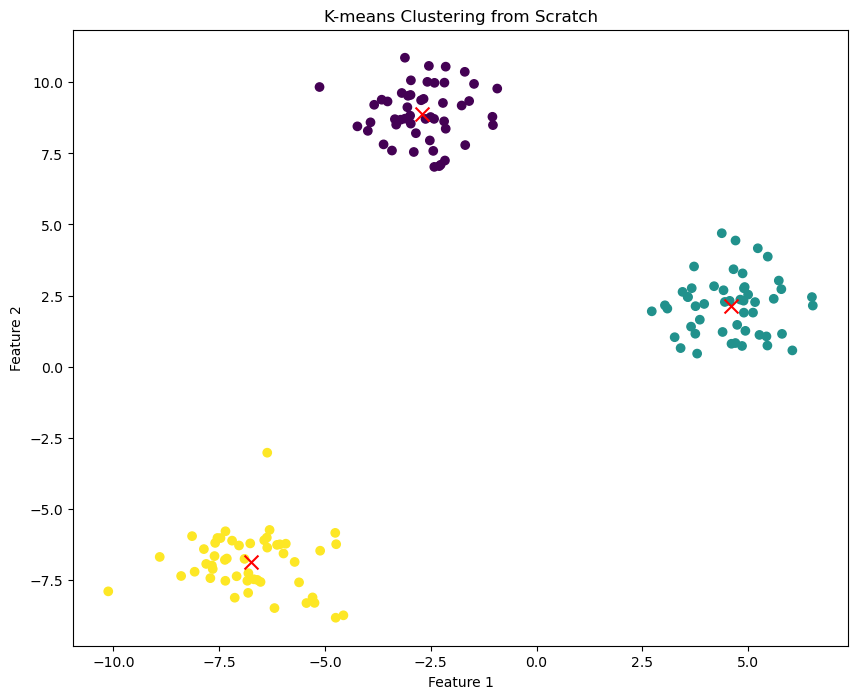

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate a classification dataset
np.random.seed(42)
data, labels = make_blobs(n_samples=150, centers=3, n_features=2, cluster_std=1.0, random_state=42)

def kmeans(data, k, max_iters=100):
    # Step 1: Initialize centroids randomly from the data points
    n_samples, n_features = data.shape
    centroids = data[np.random.choice(n_samples, k, replace=False)]

    for _ in range(max_iters):
        # Step 2: Assign clusters
        distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
        clusters = np.argmin(distances, axis=1)

        # Step 3: Update centroids
        new_centroids = np.array([data[clusters == i].mean(axis=0) for i in range(k)])
        
        # Check for convergence
        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return clusters, centroids

# Parameters
k = 3
max_iters = 100

# Run k-means
clusters, centroids = kmeans(data, k, max_iters)

# Visualization
plt.figure(figsize=(10, 8))
plt.scatter(data[:, 0], data[:, 1], c=clusters, cmap='viridis', marker='o')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100)
plt.title('K-means Clustering from Scratch')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


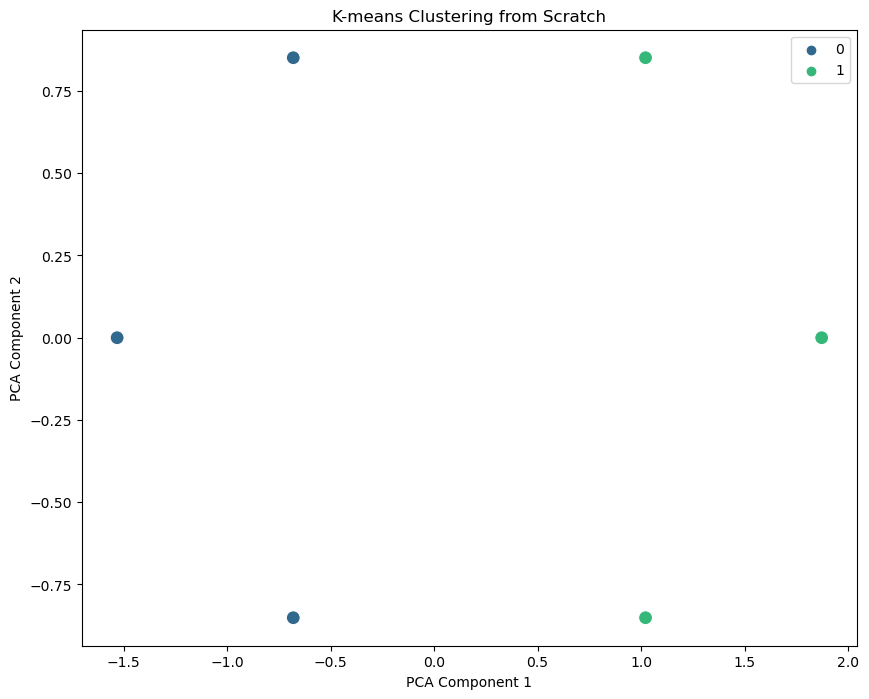

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA

# Create a simple dataset with string attributes
data = {
    "Color": ["Red", "Blue", "Green", "Red", "Green", "Blue", "Red", "Green", "Blue", "Red"],
    "Shape": ["Circle", "Square", "Triangle", "Square", "Circle", "Triangle", "Circle", "Triangle", "Square", "Circle"],
    #"Size": ["Small", "Large", "Medium", "Small", "Medium", "Large", "Large", "Medium", "Small", "Large"]
}

df = pd.DataFrame(data)

# Encode categorical variables
le_color = LabelEncoder()
le_shape = LabelEncoder()
le_size = LabelEncoder()

df['Color'] = le_color.fit_transform(df['Color'])
df['Shape'] = le_shape.fit_transform(df['Shape'])
# df['Size'] = le_size.fit_transform(df['Size'])

# Convert to numpy array
data_encoded = df.values

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_encoded)

def kmeans(data, k, max_iters=100):
    # Step 1: Initialize centroids randomly from the data points
    n_samples, n_features = data.shape
    centroids = data[np.random.choice(n_samples, k, replace=False)]

    for _ in range(max_iters):
        # Step 2: Assign clusters
        distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
        clusters = np.argmin(distances, axis=1)

        # Step 3: Update centroids
        new_centroids = np.array([data[clusters == i].mean(axis=0) for i in range(k)])
        
        # Check for convergence
        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return clusters, centroids

# Parameters
k = 2
max_iters = 100

# Run k-means
clusters, centroids = kmeans(data_scaled, k, max_iters)

# Use PCA for dimensionality reduction to visualize the clusters
pca = PCA(n_components=2)
pca_components = pca.fit_transform(data_scaled)
df['PCA1'] = pca_components[:, 0]
df['PCA2'] = pca_components[:, 1]
df['Cluster'] = clusters

# Visualization
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='viridis', s=100)
plt.title('K-means Clustering from Scratch')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()


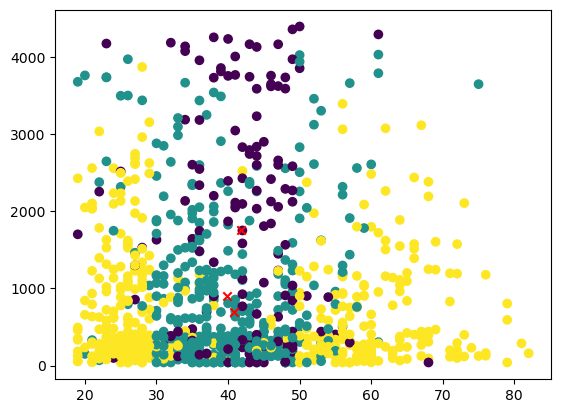

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA

df = pd.read_excel('Dataset_Kmean.xlsx')

# data = df[['Age', 'SiteTime']]
# data = df[['Age', 'SiteTime']]
data = df

# Encode categorical variables
le_education = LabelEncoder()
le_WorkType = LabelEncoder()
le_Gender = LabelEncoder()
le_Region = LabelEncoder()
data['WorkType'] = le_education.fit_transform(data['WorkType'])
data['Education'] = le_education.fit_transform(data['Education'])
data['Gender'] = le_education.fit_transform(data['Gender'])
data['Region'] = le_education.fit_transform(data['Region'])

k = 3

data = data.values
centroids = np.array( random.sample(list(data), k) )
distance = np.zeros((data.shape[0], k))

for iter in range(100):

    for i, point in enumerate(data):
        for j, center in enumerate(centroids):

            distance[i, j] = np.linalg.norm( point - center )

    clusters = np.argmin( distance, axis=1 )

    new_centroids = np.array( [ data[clusters == i].mean(axis=0) for i in range(k) ] )

    if np.all(new_centroids == centroids):
        break

    centroids = new_centroids

    
plt.scatter(data[:, 0], data[:, 1], c=clusters, marker='o')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='r')
plt.show()





